In [31]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import geopandas

In [32]:
policeFile = pd.read_csv('policeData.csv')
policeFile.head(5)

incidentNeighborhood = policeFile["INCIDENTNEIGHBORHOOD"]

In [33]:
myNeighborhoodDictPoliceData = {}
incidentNeighborhood = incidentNeighborhood.fillna("Unknown Neighborhood")
for neighborhoods in incidentNeighborhood:
    if neighborhoods in myNeighborhoodDictPoliceData:
        myNeighborhoodDictPoliceData[neighborhoods] += 1
    else:
        myNeighborhoodDictPoliceData[neighborhoods] = 1

myNeighborhoodDictPoliceData["Mount Oliver"] += myNeighborhoodDictPoliceData["Mt. Oliver Boro"]
myNeighborhoodDictPoliceData["Mount Oliver"] += myNeighborhoodDictPoliceData["Mt. Oliver Neighborhood"]
del myNeighborhoodDictPoliceData["Mt. Oliver Boro"]
del myNeighborhoodDictPoliceData["Mt. Oliver Neighborhood"]
del myNeighborhoodDictPoliceData["Unknown Neighborhood"]
myNeighborhoodDictPoliceData["Central Business District"] += myNeighborhoodDictPoliceData["Golden Triangle/Civic Arena"]
del myNeighborhoodDictPoliceData["Golden Triangle/Civic Arena"]
myNeighborhoodDictPoliceData["Central Northside"] += myNeighborhoodDictPoliceData["Central North Side"]
del myNeighborhoodDictPoliceData["Central North Side"]
del myNeighborhoodDictPoliceData["Outside City"]
del myNeighborhoodDictPoliceData["Outside County"]
del myNeighborhoodDictPoliceData["Outside State"]
myNeighborhoodDictPoliceData["Troy Hill"] += myNeighborhoodDictPoliceData["Troy Hill-Herrs Island"]
del myNeighborhoodDictPoliceData["Troy Hill-Herrs Island"]
myNeighborhoodDictPoliceData["Mt. Oliver"] = myNeighborhoodDictPoliceData["Mount Oliver"]
del myNeighborhoodDictPoliceData["Mount Oliver"]

<Axes: >

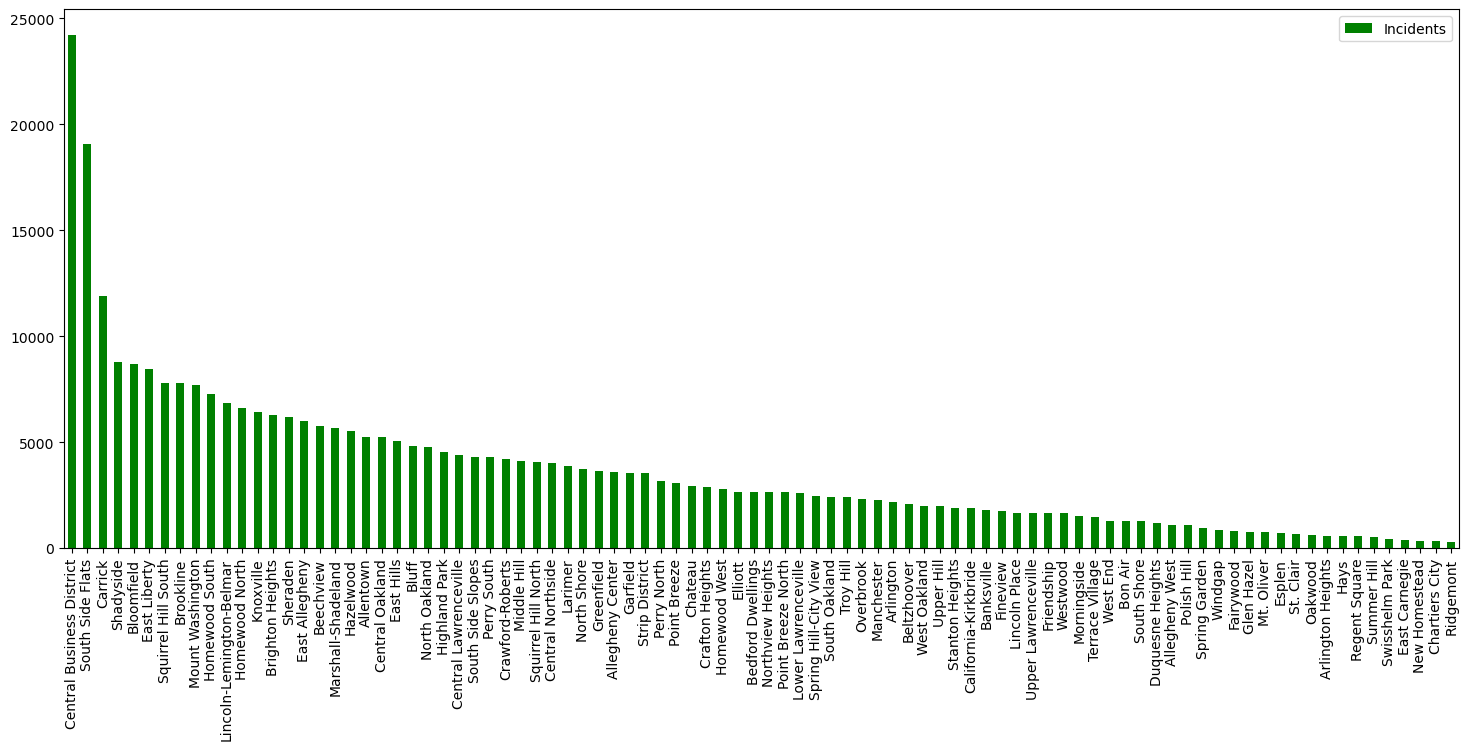

In [34]:
df = pd.DataFrame.from_dict(myNeighborhoodDictPoliceData, orient='index')
df.columns = ["Incidents"]
df.sort_values(by=['Incidents'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
df.plot(    kind='bar',
            y='Incidents',
            color='green',)

In [35]:
greenlandData = pd.read_csv('greenlandData.csv')
greenlandData = greenlandData.fillna(0)

In [36]:
myNeighborhoodDictGreenlandData = {}
for rowNum in range(0,greenlandData.shape[0]):
    neighborhood = greenlandData.iloc[rowNum,27]
    totalAcreage = float(greenlandData.iloc[rowNum,3])
    if neighborhood == 0:
        pass
    elif neighborhood in myNeighborhoodDictGreenlandData:
        myNeighborhoodDictGreenlandData[neighborhood] += totalAcreage
    else:
        myNeighborhoodDictGreenlandData[neighborhood] = totalAcreage

<Axes: >

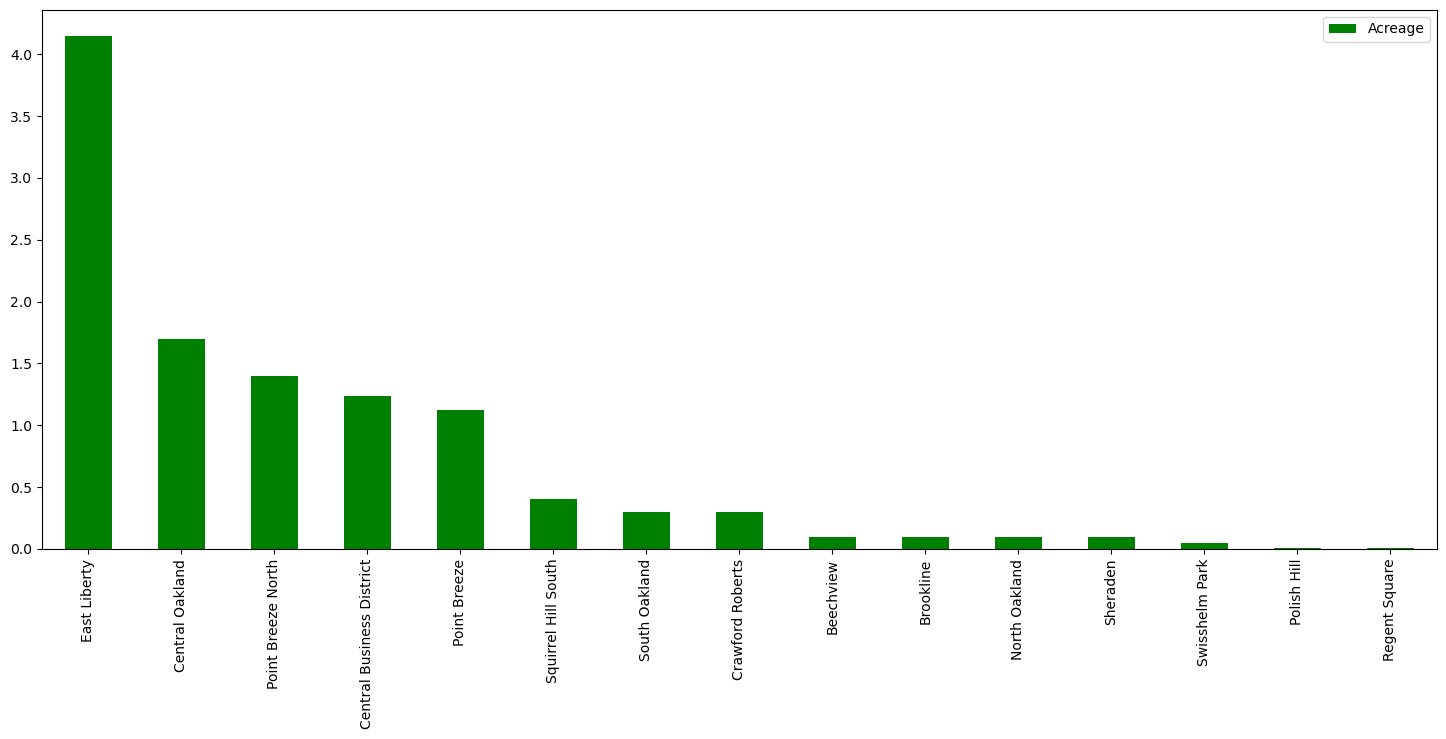

In [37]:
gdf = pd.DataFrame.from_dict(myNeighborhoodDictGreenlandData, orient='index')
gdf.columns = ["Acreage"]
gdf.sort_values(by=['Acreage'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
gdf.plot(   kind='bar',
            y='Acreage',
            color='green',)

In [38]:
crimeMax = max(myNeighborhoodDictPoliceData.values())
greenlandMax = max(myNeighborhoodDictGreenlandData.values())

<Axes: >

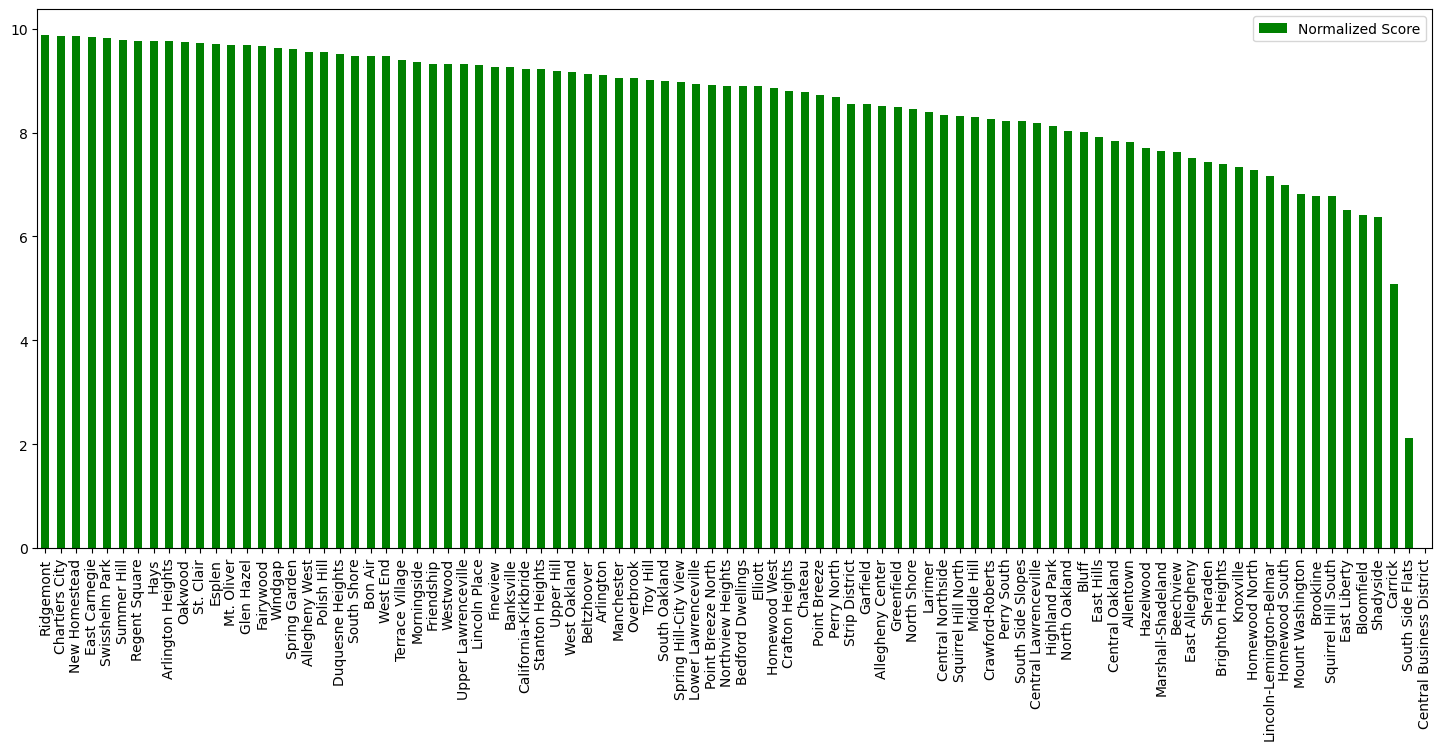

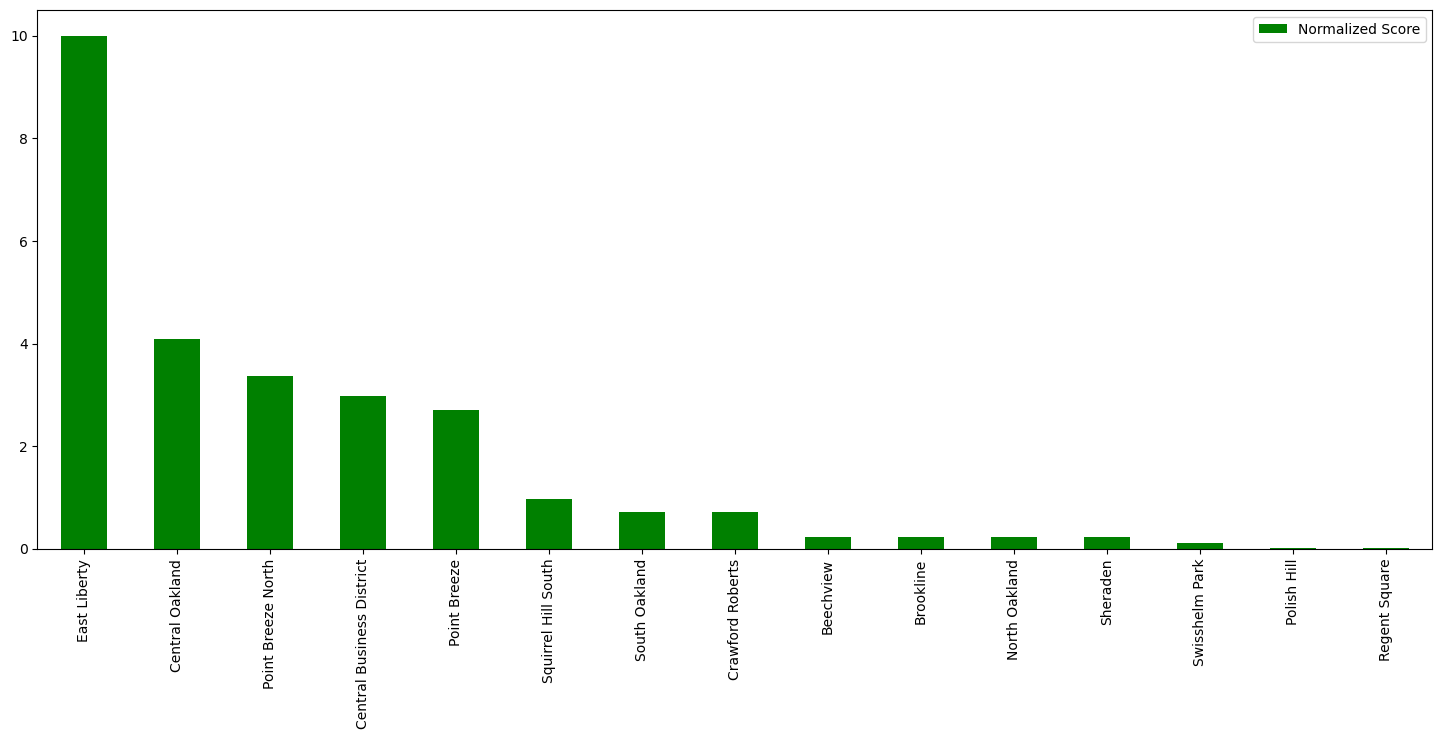

In [39]:
for keys in myNeighborhoodDictPoliceData:
    myNeighborhoodDictPoliceData[keys] = (1 - (myNeighborhoodDictPoliceData[keys]/crimeMax)) * 10

ndf = pd.DataFrame.from_dict(myNeighborhoodDictPoliceData, orient='index')
ndf.columns = ["Normalized Score"]
ndf.sort_values(by=['Normalized Score'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
ndf.plot(   kind='bar',
            y='Normalized Score',
            color='green',)

for keys in myNeighborhoodDictGreenlandData:
    myNeighborhoodDictGreenlandData[keys] = myNeighborhoodDictGreenlandData[keys]/greenlandMax * 10

ngdf = pd.DataFrame.from_dict(myNeighborhoodDictGreenlandData, orient='index')
ngdf.columns = ["Normalized Score"]
ngdf.sort_values(by=['Normalized Score'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
ngdf.plot(   kind='bar',
            y='Normalized Score',
            color='green',)

##---------------FIREEEE-----------------------------

In [40]:
fire_incidents = pd.read_csv('fire_incidents_data.csv')
fire_incidents = fire_incidents[fire_incidents['neighborhood'].notna()]

In [41]:
dict = {}

for index, row in fire_incidents.iterrows():
    if row['neighborhood'] in dict:
        dict[row['neighborhood']] += 1
    else:
        dict[row['neighborhood']] = 1

dict

{'Fineview': 49,
 'Fairywood': 26,
 'South Side Flats': 269,
 'Allegheny Center': 62,
 'Lincoln-Lemington-Belmar': 197,
 'Carrick': 289,
 'Beechview': 147,
 'Allentown': 127,
 'Beltzhoover': 129,
 'Crafton Heights': 84,
 'Homewood North': 183,
 'Squirrel Hill South': 255,
 'Perry North': 111,
 'Bedford Dwellings': 45,
 'Homewood South': 193,
 'East Allegheny': 134,
 'Crawford-Roberts': 109,
 'Sheraden': 172,
 'Middle Hill': 105,
 'Strip District': 66,
 'East Hills': 156,
 'Garfield': 112,
 'Greenfield': 117,
 'North Shore': 65,
 'Spring Hill-City View': 107,
 'Central Business District': 274,
 'Upper Hill': 46,
 'Manchester': 80,
 'Overbrook': 58,
 'Polish Hill': 39,
 'Central Lawrenceville': 77,
 'Brookline': 195,
 'Marshall-Shadeland': 145,
 'North Oakland': 129,
 'South Oakland': 96,
 'Homewood West': 62,
 'East Liberty': 208,
 'Hazelwood': 249,
 'Squirrel Hill North': 135,
 'Friendship': 32,
 'West Oakland': 62,
 'Terrace Village': 86,
 'Brighton Heights': 154,
 'Troy Hill': 84,
 '

In [42]:
del dict['Mount Oliver Borough']
len(dict)

90

In [43]:
fire_incidents_neighborhood = pd.DataFrame.from_dict(dict, orient='index', columns=['Frequency'])
# fire_incidents_neighborhood = panda.DataFrame([dict.keys(), dict.values()]).T
# fire_incidents_neighborhood.columns= ['Neighborhood', 'Frequency']

In [44]:
fire_incidents_neighborhood.sort_values(by=['Frequency'], ascending=False, inplace=True)

<Axes: >

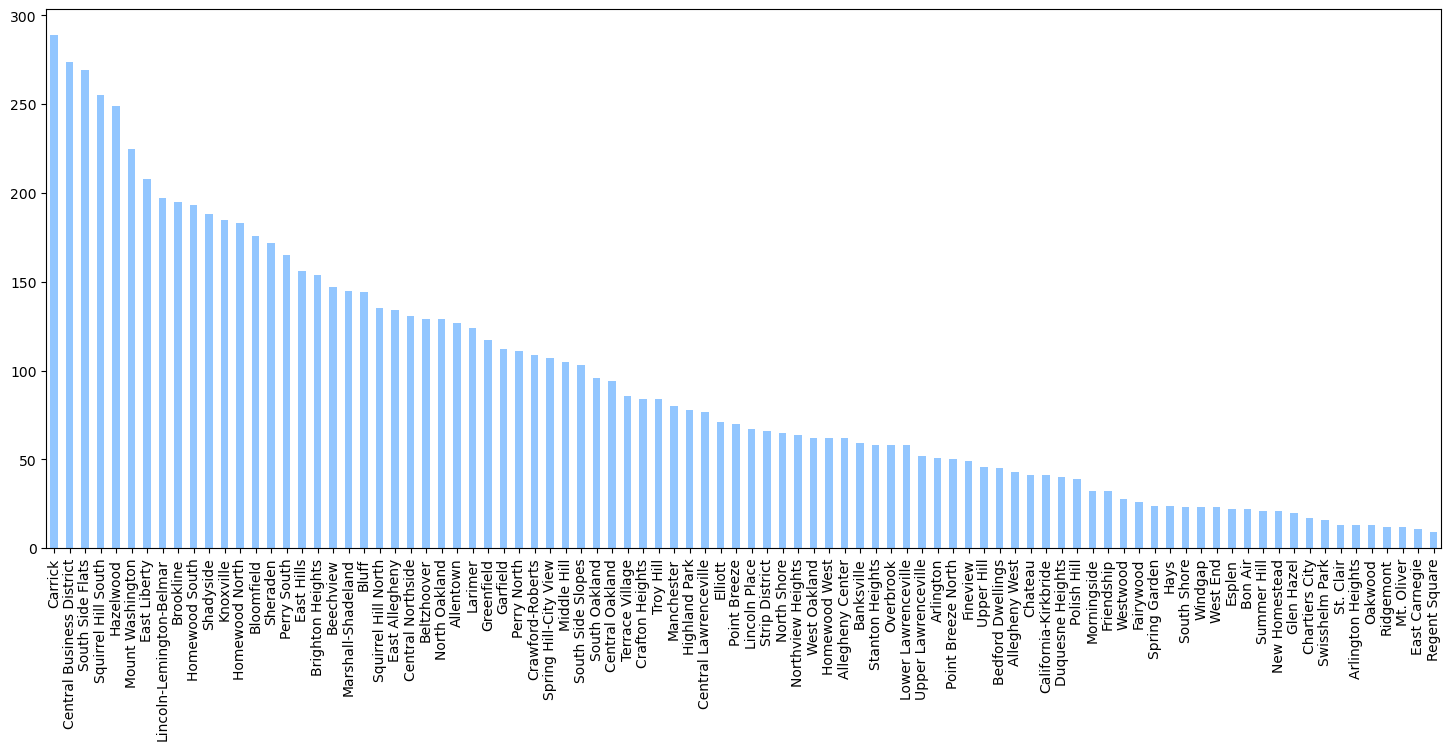

In [45]:
plt.rcParams["figure.figsize"] = (18, 7)
plt.style.use('seaborn-v0_8-pastel')
fire_incidents_neighborhood['Frequency'].plot(kind="bar")

In [46]:
population = pd.read_csv('population_data.csv')
population.columns = ['Neighborhood', 'Id', 'Total', 'Margin of Error']
population.head(10)

,Neighborhood,Id,Total,Margin of Error
0,Allegheny Center,1,1411.0,196.000000
1,Allegheny West,2,343.0,96.000000
2,Allentown,3,2558.0,449.773276
3,Arlington,4,1852.0,348.188168
4,Arlington Heights,5,272.0,126.000000
5,Banksville,6,3858.0,581.107563
6,Bedford Dwellings,7,1349.0,180.000000
7,Beechview,8,8078.0,719.658252
8,Beltzhoover,9,1702.0,343.072879
9,Bloomfield,10,8669.0,491.348145


In [47]:
population = population.drop([52])

In [48]:
fire_incidents_neighborhood.sort_index(inplace=True)
fire_incidents_neighborhood.insert(1, "Population", population['Total'].tolist(), 1)
fire_incidents_neighborhood

,Frequency,Population
Allegheny Center,62,1411.0
Allegheny West,43,343.0
Allentown,127,2558.0
Arlington,51,1852.0
Arlington Heights,13,272.0
...,...,...
Upper Lawrenceville,52,2754.0
West End,23,235.0
West Oakland,62,1717.0
Westwood,28,3537.0


In [49]:
fire_ratio = []
frequency_normalized = []
population_normalized = []
fireList = fire_incidents_neighborhood['Frequency'].tolist()
popList = fire_incidents_neighborhood['Population'].to_list()

maxFire = max(fireList)
minFire = min(fireList)
fireRange = maxFire - minFire

maxPop = max(popList)
minPop = min(popList)
popRange = maxPop - minPop

for i in range(len(fireList)):
    fireNorm = (fireList[i] - minFire) / fireRange
    if (popList[i] != minPop):
        popNorm = (popList[i] - minPop) / popRange
    else:
        popNorm = popList[i] / popRange
    ratio = fireNorm / popNorm
    fire_ratio.append(ratio)

In [50]:
for i in range(len(fire_ratio)):
    if fire_ratio[i] > 6:
        fire_ratio[i] = 6

In [51]:
fire_ratio_normalized = []

maxRate = max(fire_ratio)
minRate = min(fire_ratio)
rateRange = maxRate - minRate

for i in range(len(fire_ratio)):
    ratioNorm = (fire_ratio[i] - minRate) / rateRange
    fire_ratio_normalized.append(ratioNorm)

In [52]:
fire_incidents_neighborhood.insert(2, "Rating By Population", fire_ratio_normalized, True)

<Axes: >

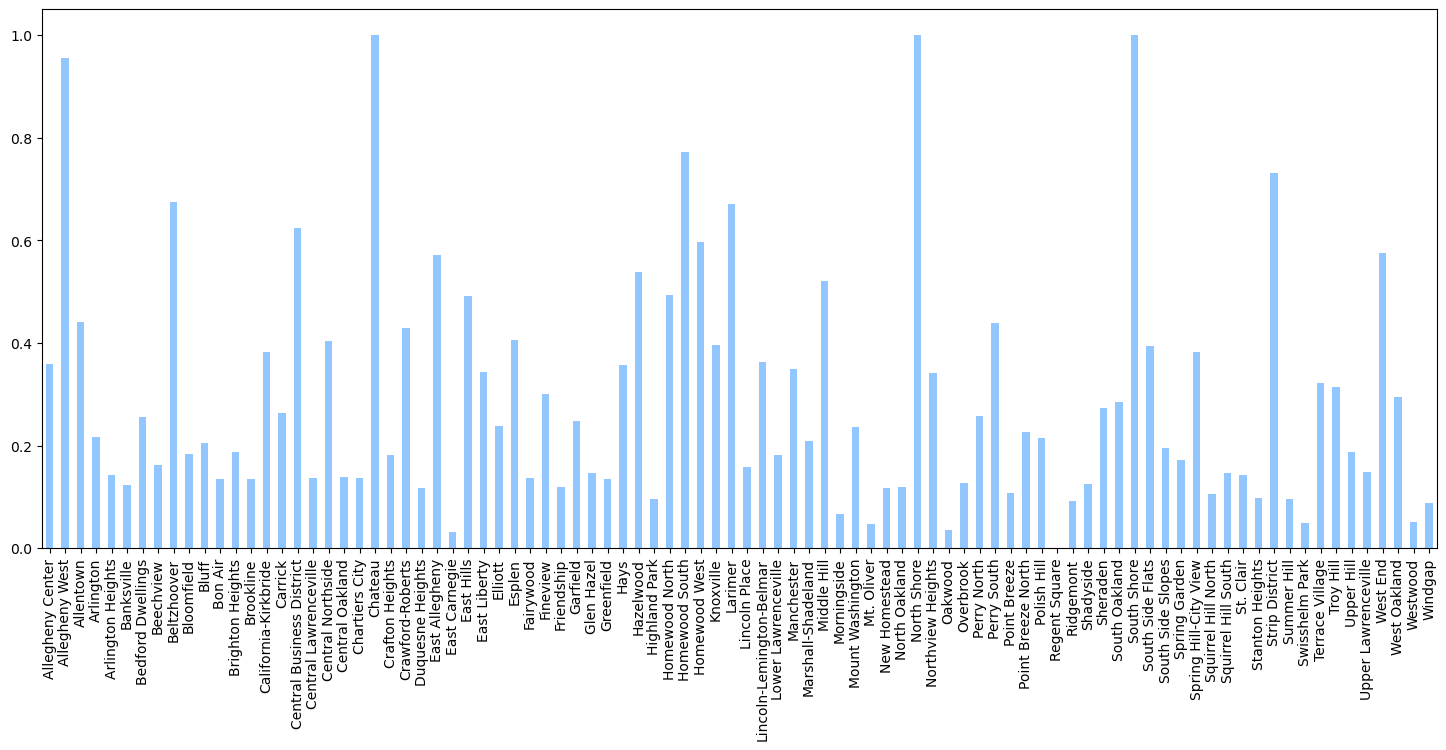

In [53]:
fire_incidents_neighborhood["Rating By Population"].plot.bar()

In [54]:
fire_incidents_neighborhood.sort_values(by=['Rating By Population'], ascending=False, inplace=True)
fire_incidents_neighborhood.head(20)

,Frequency,Population,Rating By Population
North Shore,65,205.0,1.000000
Chateau,41,3.0,1.000000
South Shore,23,12.0,1.000000
Allegheny West,43,343.0,0.954702
Homewood South,193,2276.0,0.772834
Strip District,66,747.0,0.731425
Beltzhoover,129,1702.0,0.674304
Larimer,124,1641.0,0.670273
Central Business District,274,4060.0,0.623604
Homewood West,62,850.0,0.597393


In [55]:
fire_incidents = fire_incidents[fire_incidents['alarm_time'].notna()]

In [56]:
yearList = []

for time in fire_incidents['alarm_time']:
    year = time[0:4:1]
    yearList.append(year)

len(yearList)

8288

In [57]:
fire_incidents.insert(2, "year", yearList, True)
fire_by_year = fire_incidents[['neighborhood','year']]

In [58]:
dict = {}

for index, row in fire_by_year.iterrows():
    if int(row['year']) >= 2022:
        if row['neighborhood'] in dict:
                dict[row['neighborhood']] += 1
        else :
                dict[row['neighborhood']] = 1
    else:
        dict[row['neighborhood']] = 0

In [59]:
del dict['Mount Oliver Borough']
len(dict)

90

In [60]:
by_past_3_years = pd.DataFrame.from_dict(dict, orient='index', columns=['frequency'])
by_past_3_years.sort_index(inplace=True)

In [61]:
fire_incidents_neighborhood.sort_index(inplace=True)
fire_incidents_neighborhood.insert(3, "Past 3 Years frequency", by_past_3_years['frequency'].tolist(), True)
fire_incidents_neighborhood

,Frequency,Population,Rating By Population,Past 3 Years frequency
Allegheny Center,62,1411.0,0.359370,8
Allegheny West,43,343.0,0.954702,5
Allentown,127,2558.0,0.440919,12
Arlington,51,1852.0,0.216860,7
Arlington Heights,13,272.0,0.141963,1
...,...,...,...,...
Upper Lawrenceville,52,2754.0,0.149226,9
West End,23,235.0,0.576114,4
West Oakland,62,1717.0,0.295211,7
Westwood,28,3537.0,0.051328,5


In [62]:
past3 = fire_incidents_neighborhood['Past 3 Years frequency'].tolist()
total = fire_incidents_neighborhood['Frequency'].tolist()
ratio_3_years = []

for i in range(len(past3)):
    ratio3 = past3[i] / total[i]
    ratio_3_years.append(ratio3)

In [63]:
ratio_3_years_normalized = []
maxRate3 = max(ratio_3_years)
minRate3 = min(ratio_3_years)
range3 = maxRate3 - minRate3

for ratio in ratio_3_years:
    ratio3Norm = (ratio - minRate3) / range3
    ratio_3_years_normalized.append(ratio3Norm)

fire_incidents_neighborhood.insert(4, "Rating by increase", ratio_3_years_normalized, True)

In [64]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# neighborhoods.plot() # plot the geopandas dataframe

In [65]:
steps_map = neighborhoods.merge(fire_incidents_neighborhood, 
                                how='left', 
                                left_on='hood', 
                                right_on=fire_incidents_neighborhood.index)

Text(0.5, 69.97084282383948, 'Fire Incidents by Neighborhood')

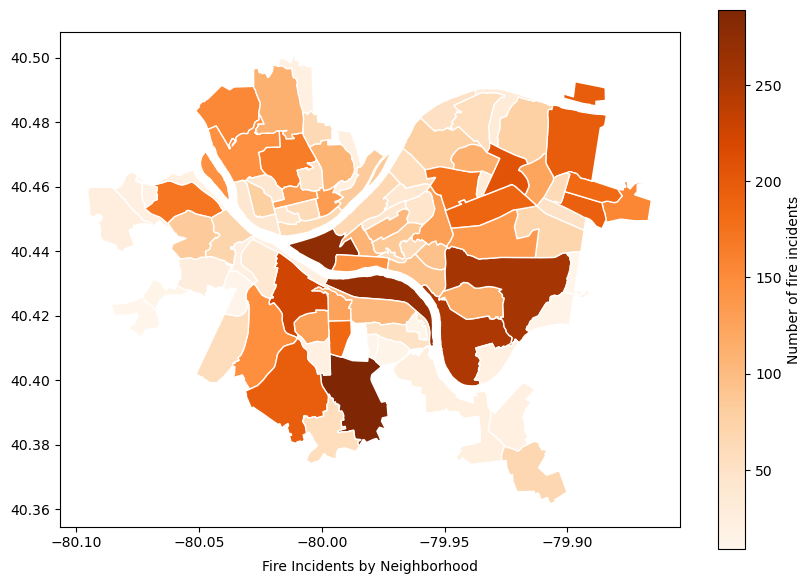

In [66]:
# draw a choropleth map using data from the column named "number_of_steps"
steps_map.plot(column='Frequency',
               cmap='Oranges',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Number of fire incidents"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Fire Incidents by Neighborhood", labelpad=7)

In [67]:
fire_incidents_neighborhood.sort_values(by=['Rating By Population'], ascending=False, inplace=True)

In [68]:
scoresList = []
i = 1

for index, row in fire_incidents_neighborhood.iterrows():
    if i <= 10:
        score = 1 - row['Rating by increase'] - 0.1
        if score < 0:
            score = 0
    elif i > 80:
        score = 1 -row['Rating by increase'] + 0.1
        if score > 1:
            score = 1
    else:
        score = 1 - row['Rating by increase']
    
    score *= 10
    score = round(score, 1)
    i += 1
    scoresList.append(score)

In [69]:
fire_incidents_neighborhood.insert(5, "Final Score", scoresList, True)

<Axes: >

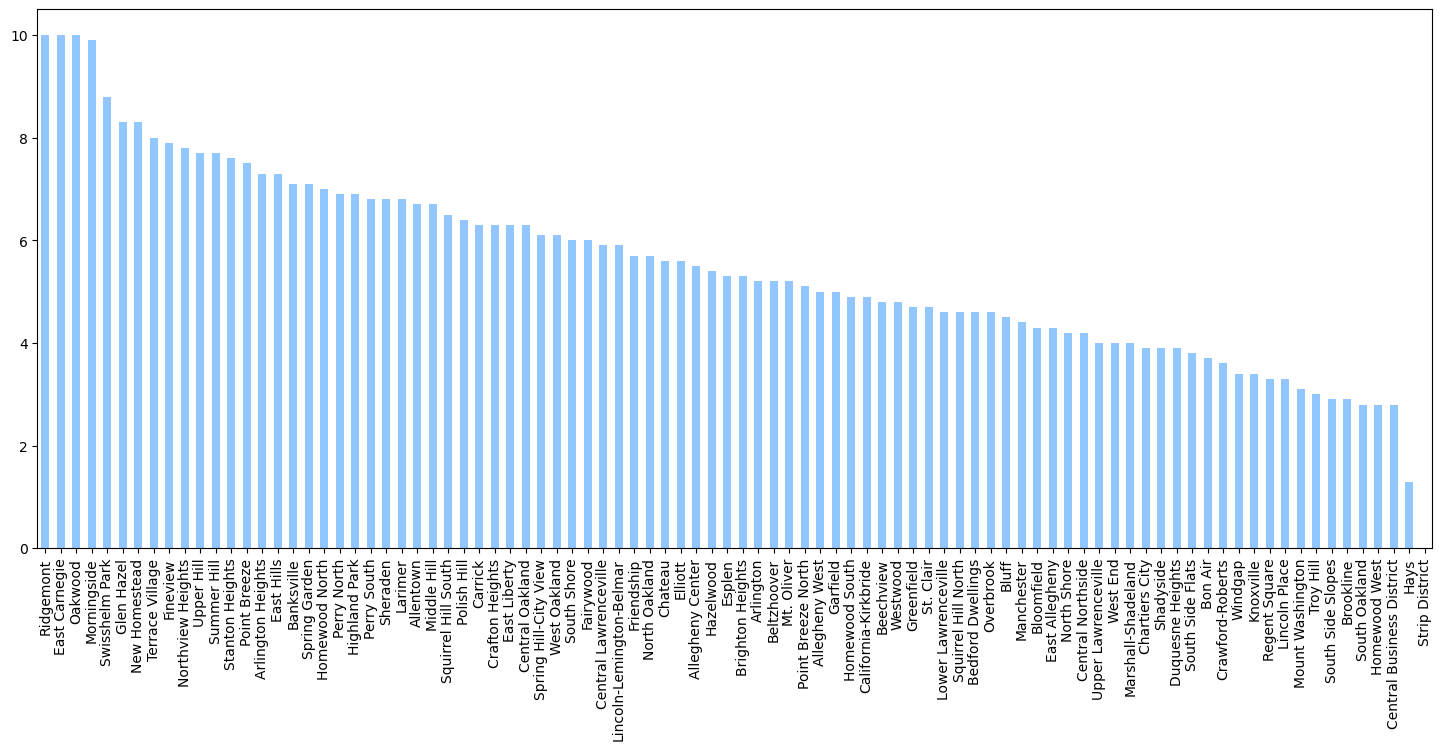

In [70]:
fire_incidents_neighborhood.sort_values(by=['Final Score'], ascending=False, inplace=True)
fire_incidents_neighborhood['Final Score'].plot(kind='bar')